In [1]:
# only adjust settings in this cell
state = 'AL'
root_name = 'Jefferson'    # which county will root our district (or county_cluster==multi-district)?
k = 7                      # the state has this number of districts
deviation = 1              # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 2                   # size=1 for single district, size=2 for double district, ...
obj_type = 'inverse_polsby_popper' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a county cluster of size =",G._size)

State has total of k = 7 districts
We seek a county cluster of size = 2


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 717754
Single district upper population limit U = 717755


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Jefferson County to be the root. In our graph, this is vertex # 22


In [6]:
from optimization import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-19
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 548 rows, 650 columns and 2841 nonzeros
Model fingerprint: 0xefece717
Model has 1 quadratic constraint
Variable types: 345 continuous, 305 integer (305 binary)
Coefficient statistics:
  Matrix range     [1e-02, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+06]
Presolve removed 76 rows and 74 columns
Presolve time: 0.01s
Presolved: 472 rows, 576 columns, 2534 nonzeros
Presolved model has 1 quadratic constraint(s)
Vari

 972317 432263    5.21957   36   61          -    3.62265      -  15.1  285s
 984843 437484    7.77047   41   11          -    3.62898      -  15.0  290s
 998964 443128    4.62210   35   40          -    3.63639      -  15.0  295s
found [15, 16, 21, 22, 23, 26, 28, 33, 37, 43, 45, 46, 57, 62, 63] with objective = 9.518360651900982
   replaced worse solution with objective = 9.603827808816138
adding cut saying that objective should be less than 9.518360651900982
 1010539 447964 infeasible   41               -    3.64231      -  15.0  300s
 1022209 453471    4.18055   43   54          -    3.64770      -  15.0  305s
 1034375 457939    5.13716   44   30          -    3.65286      -  15.0  310s
 1045012 462750    5.14412   37   19          -    3.65811      -  15.0  315s
found [2, 3, 9, 15, 17, 19, 22, 23, 33, 36, 38, 39, 40, 43, 50, 51, 52, 53, 56, 57, 64, 65, 66] with objective = 7.060034118364158
   replaced worse solution with objective = 9.518360651900982
adding cut saying that object

 1953969 817385    5.21725   54    7          -    4.00633      -  14.5  750s
 1964393 821280 infeasible   45               -    4.00944      -  14.5  755s
 1974073 825420    4.92985   48    6          -    4.01208      -  14.5  761s
 1983622 829053 infeasible   45               -    4.01525      -  14.5  765s
 1994300 832555    4.99203   48   15          -    4.01823      -  14.5  771s
 2001286 835517    6.54289   37   19          -    4.02023      -  14.5  775s
 2012584 839580 infeasible   45               -    4.02318      -  14.5  781s
 2020371 842743    4.58161   53   14          -    4.02539      -  14.5  785s
 2030735 846576    4.23893   40    6          -    4.02819      -  14.5  790s
 2038911 849844 infeasible   51               -    4.03034      -  14.5  795s
found [1, 9, 11, 22, 23, 26, 33, 36, 37, 39, 40, 43, 45, 46, 47, 50, 56, 64, 65] with objective = 5.667331322216529
   replaced worse solution with objective = 7.895880775975186
adding cut saying that objective should be

 2698303 1078046    5.77506   42    5          -    4.15960      -  14.3 1190s
 2708501 1081420 infeasible   37               -    4.15960      -  14.3 1196s
 2715563 1083810    5.08511   46    7          -    4.15960      -  14.3 1201s
 2724767 1086582    6.03799   39   38          -    4.15960      -  14.2 1206s
 2732464 1089080 infeasible   56               -    4.15960      -  14.2 1211s
 2741413 1091611    4.70997   46   46          -    4.15960      -  14.2 1216s
 2749153 1093963    4.52840   53    8          -    4.15960      -  14.2 1221s
 2754808 1096016    4.93018   42    4          -    4.15960      -  14.2 1225s
 2762811 1098535    4.84907   41   16          -    4.15960      -  14.2 1230s
 2772193 1101451 infeasible   42               -    4.15960      -  14.2 1236s
 2780063 1103904    6.18930   48   12          -    4.15960      -  14.2 1241s
 2785634 1105437    6.05614   38   60          -    4.15960      -  14.2 1245s
 2794336 1108386    6.01618   46   19          -    

 3416910 1297870    6.41400   50   27          -    4.15960      -  14.1 1695s
 3423800 1299412    5.63202   39   24          -    4.15960      -  14.1 1700s
 3431808 1302014    6.15531   45   40          -    4.15960      -  14.1 1706s
 3440095 1304273    5.71718   36   24          -    4.15960      -  14.1 1711s
 3445436 1305991    5.28116   52   34          -    4.15960      -  14.1 1715s
 3454630 1308653    5.50964   45   17          -    4.15960      -  14.1 1721s
 3460723 1310117    4.96987   49   28          -    4.15960      -  14.1 1725s
 3468564 1312589    5.09138   49   15          -    4.15960      -  14.1 1730s
 3473739 1314456    5.46748   47   34          -    4.15960      -  14.1 1735s
 3483043 1317153 infeasible   56               -    4.15960      -  14.1 1741s
 3488842 1318738    5.42056   51    7          -    4.15960      -  14.1 1745s
 3496795 1321118    4.66603   41    6          -    4.15960      -  14.1 1751s
 3503908 1322973 infeasible   45               -    

 4052066 1479700    6.02726   47   19          -    4.15960      -  14.0 2170s
 4060215 1481830 infeasible   45               -    4.15960      -  14.0 2176s
found [0, 1, 2, 17, 22, 23, 33, 36, 37, 39, 43, 45, 56, 58, 65] with objective = 4.518300185445581
   replaced worse solution with objective = 6.418872100643945
adding cut saying that objective should be less than 6.285016623653404
 4065882 1483548    4.56488   27   32          -    4.15960      -  14.0 2181s
 4071919 1484621    5.77116   48   23          -    4.15960      -  14.0 2185s
 4078537 1486569 infeasible   38               -    4.15960      -  14.0 2191s
 4084189 1488334    5.07924   55    7          -    4.15960      -  14.0 2195s
 4090413 1489965    5.02992   57    7          -    4.15960      -  14.0 2200s
 4096627 1491019    5.91773   51    7          -    4.15960      -  13.9 2206s
 4102322 1492706    5.91822   34   19          -    4.15960      -  13.9 2211s
 4107011 1493790    4.77416   61    7          -    4.159

 4660681 1629163 infeasible   35               -    4.15960      -  13.8 2675s
 4667168 1630811    5.73436   41   30          -    4.15960      -  13.8 2681s
 4671245 1632128    5.44245   52    7          -    4.15960      -  13.8 2685s
 4679742 1633905 infeasible   55               -    4.15960      -  13.8 2691s
 4686014 1635678    4.90097   47    7          -    4.15960      -  13.8 2696s
 4691487 1636818    6.12819   50   11          -    4.15960      -  13.8 2702s
 4694413 1637578    4.95090   44   16          -    4.15960      -  13.8 2705s
 4700901 1639284 infeasible   56               -    4.15960      -  13.8 2710s
found [0, 2, 9, 17, 20, 22, 23, 28, 33, 36, 39, 40, 43, 45, 46, 51, 56, 65] with objective = 4.642128055946764
   replaced worse solution with objective = 6.285016623653404
adding cut saying that objective should be less than 5.9184536839756765
 4708131 1640571    4.77956   39   10          -    4.15960      -  13.8 2715s
 4714104 1641736    5.66768   53    7       

 5204507 1713096    5.70995   48    7          -    4.15960      -  13.7 3165s
 5211365 1713770    5.41214   30   55          -    4.15960      -  13.7 3172s
 5215458 1714067    4.83361   40   11          -    4.15960      -  13.7 3175s
 5222057 1715178 infeasible   50               -    4.15960      -  13.7 3182s
 5225352 1715793    5.33384   57    7          -    4.15960      -  13.7 3185s
 5231448 1716472 infeasible   53               -    4.15960      -  13.7 3191s
 5236224 1716987    5.38676   42   36          -    4.15960      -  13.7 3196s
 5239469 1717631 infeasible   60               -    4.15960      -  13.7 3200s
 5244988 1718353    4.93413   47   15          -    4.15960      -  13.7 3205s
 5250877 1718954    5.13903   31   57          -    4.15960      -  13.7 3210s
 5256141 1719594    5.51086   49    6          -    4.15960      -  13.7 3216s
 5260861 1720012    4.97672   47   12          -    4.15960      -  13.7 3221s
 5264409 1720496    5.50782   51   21          -    

 5713427 1766787 infeasible   41               -    4.15960      -  13.6 3656s
 5716962 1766893 infeasible   52               -    4.15960      -  13.6 3660s
 5723803 1766950 infeasible   33               -    4.15960      -  13.6 3666s
 5728084 1767166    5.16084   45   21          -    4.15960      -  13.6 3671s
 5732200 1767419 infeasible   44               -    4.15960      -  13.6 3675s
 5738414 1767758    5.12577   31   47          -    4.15960      -  13.6 3681s
 5741802 1767859    5.11727   48   10          -    4.15960      -  13.6 3685s
 5746678 1768129    5.04833   43    8          -    4.15960      -  13.6 3690s
 5753019 1768286    5.42523   44    7          -    4.15960      -  13.6 3696s
 5757249 1768543    5.15639   50    5          -    4.15960      -  13.6 3701s
 5760687 1768803    5.52799   51   30          -    4.15960      -  13.6 3705s
 5766818 1769122    5.65799   31   27          -    4.15960      -  13.6 3710s
 5773060 1769339    5.15251   35   14          -    

 6830422 998255 infeasible   51               -    4.15960      -  13.0 4145s
 6889586 939091 infeasible   52               -    4.15960      -  12.9 4150s
 6948996 879700 infeasible   39               -    4.15960      -  12.9 4155s
 7006175 822467 infeasible   45               -    4.15960      -  12.8 4160s
 7067672 760988 infeasible   44               -    4.15960      -  12.7 4165s
 7129338 699277 infeasible   48               -    4.15960      -  12.7 4170s
 7189038 639660 infeasible   33               -    4.15960      -  12.6 4175s
 7250860 577814 infeasible   45               -    4.15960      -  12.5 4180s
 7317244 511424 infeasible   44               -    4.15960      -  12.5 4185s
 7381286 447369 infeasible   45               -    4.15960      -  12.4 4190s
 7445599 383014 infeasible   50               -    4.15960      -  12.3 4195s
 7516701 311942 infeasible   44               -    4.15960      -  12.2 4200s
 7583490 245157 infeasible   48               -    4.15960      

In no particular order, the top 10 clusters are:


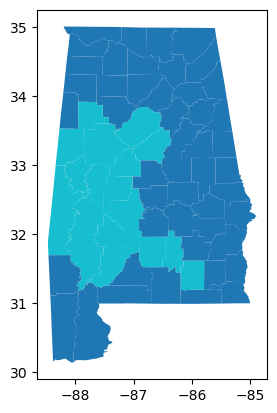

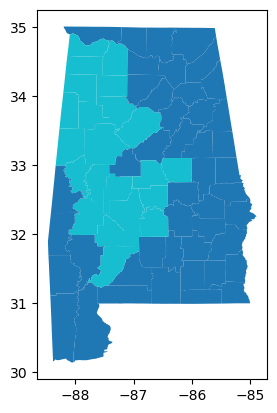

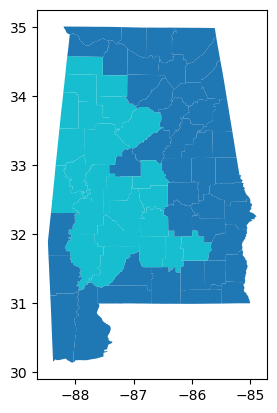

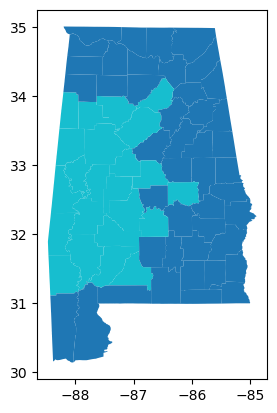

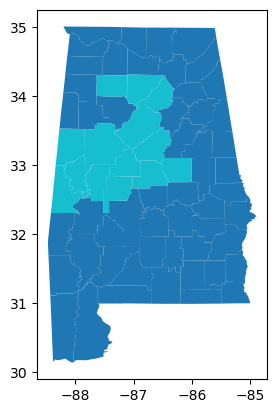

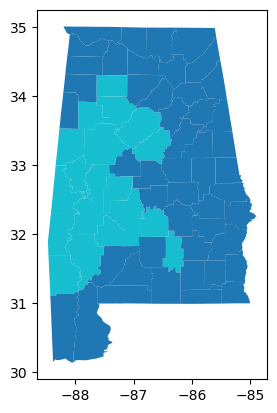

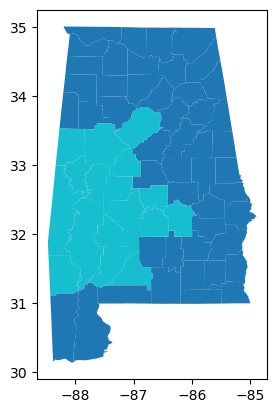

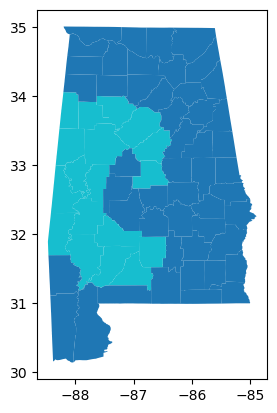

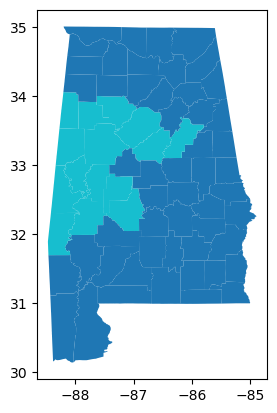

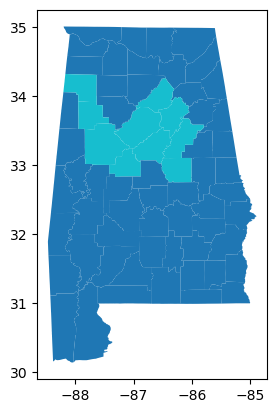

In [7]:
# Draw the districting plans
from draw import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 10 clusters are:")
for district in districts:
    draw_single_district( filepath, filename, G, district, zoom=False )

In [8]:
print("clusters =",districts)

clusters = [[0, 1, 2, 9, 13, 22, 26, 29, 33, 36, 37, 39, 40, 43, 45, 46, 51, 56, 65], [1, 2, 15, 17, 19, 22, 23, 28, 33, 36, 37, 38, 39, 43, 45, 46, 51, 52, 53, 54, 57, 62], [1, 2, 9, 13, 17, 19, 22, 23, 28, 33, 36, 37, 39, 40, 43, 45, 46, 51, 52, 53, 55, 56, 57, 62], [1, 2, 9, 11, 17, 20, 21, 22, 23, 26, 28, 33, 36, 37, 39, 43, 45, 46, 50, 51, 53, 56, 65], [0, 2, 22, 26, 28, 36, 37, 39, 45, 50, 54, 56, 57, 66], [0, 1, 2, 9, 11, 13, 22, 23, 33, 36, 37, 39, 43, 45, 46, 53, 56, 57, 65], [1, 2, 9, 11, 20, 22, 25, 26, 33, 36, 37, 39, 45, 46, 51, 53, 56, 62, 65], [0, 2, 9, 17, 20, 22, 23, 28, 33, 36, 39, 40, 43, 45, 46, 51, 56, 65], [0, 1, 2, 17, 22, 23, 33, 36, 37, 39, 43, 45, 56, 58, 65], [0, 22, 26, 43, 45, 50, 52, 54, 58, 64]]
